In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras import backend as K

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [3]:
import random
random.uniform(0.01, 1)

0.17353554759143794

In [4]:
import numpy as np
import random
from PIL.ImageOps import equalize as eq

def lap (img):
    img=image.array_to_img (img).convert('RGB') 
 
    open_cv_image = numpy.array(img) 
# Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    laplacian = cv2.Laplacian(open_cv_image,cv2.CV_64F)
    
    return laplacian
    

In [5]:
from keras.layers import Activation ,Conv2D ,BatchNormalization , Dense ,Dropout ,Flatten ,MaxPool2D
from keras.models import Sequential

In [6]:
model = Sequential([
            BatchNormalization(axis=1, input_shape=(150,300,1)),
            Conv2D(32,(3,3), activation='relu'),
          
            MaxPool2D((2,2)),
    
            BatchNormalization(axis=1),
            Conv2D(64,(3,3), activation='relu'),
            MaxPool2D((2,2)),
        
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
          
            MaxPool2D((6,6)),
            Flatten(),
            Dense(256, activation='relu'),
            BatchNormalization(),
       
            Dense(256, activation='relu'),
            BatchNormalization(),
           
            Dense(1, activation='sigmoid')
        ])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 150, 300, 1)       600       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 149, 32)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 74, 149, 32)       296       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 73, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 36, 73, 64)        144       
__________

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
gen=image.ImageDataGenerator(rotation_range=15,shear_range=0.1 ,channel_shift_range=0.2 ,width_shift_range=0.4 , height_shift_range=0.25)
gen1=image.ImageDataGenerator()
#gen1=image.ImageDataGenerator(preprocessing_function=white)

In [9]:
batch_size=30

train= gen.flow_from_directory('train3', target_size=(150,300),
                class_mode='binary', shuffle=True, batch_size=batch_size, color_mode='grayscale')

Found 5381 images belonging to 2 classes.


In [10]:
val= gen1.flow_from_directory('val', target_size=(150,300),
                class_mode='binary', shuffle=False, batch_size=batch_size, color_mode='grayscale')

Found 594 images belonging to 2 classes.


In [11]:
from keras.optimizers import Adam
model.compile(Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
model.load_weights ('newone19.h5')

In [12]:
batch_size=30
model.fit_generator(train, steps_per_epoch=5381 /batch_size, epochs=3, 
                            validation_data=val, validation_steps=594/batch_size)

Epoch 1/3
180/179 [==============================] - 204s - loss: 0.6955 - acc: 0.6109 - val_loss: 0.6899 - val_acc: 0.5202
Epoch 2/3
180/179 [==============================] - 193s - loss: 0.5967 - acc: 0.6848 - val_loss: 0.5028 - val_acc: 0.7845
Epoch 3/3
180/179 [==============================] - 188s - loss: 0.5517 - acc: 0.7182 - val_loss: 0.4328 - val_acc: 0.8300


In [ ]:
model.optimizer.lr=0.01
model.fit_generator(train, steps_per_epoch=5381/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

Epoch 1/5
180/179 [==============================] - 336s - loss: 0.4236 - acc: 0.8063 - val_loss: 0.2593 - val_acc: 0.9074
Epoch 2/5
180/179 [==============================] - 316s - loss: 0.4152 - acc: 0.8132 - val_loss: 0.3157 - val_acc: 0.8788
Epoch 3/5
148/179 [=======================>......] - ETA: 43s - loss: 0.4161 - acc: 0.8103

In [37]:
   
model.optimizer.lr=0.1
for i in range (1,10):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('newone{x}.h5'.format(x=i))

Epoch 1/5
160/159 [==============================] - 104s - loss: 0.4893 - acc: 0.7790 - val_loss: 0.4950 - val_acc: 0.8098
Epoch 2/5
160/159 [==============================] - 103s - loss: 0.4531 - acc: 0.7904 - val_loss: 1.9063 - val_acc: 0.4949
Epoch 3/5
160/159 [==============================] - 105s - loss: 0.4329 - acc: 0.8037 - val_loss: 0.8189 - val_acc: 0.5034
Epoch 4/5
160/159 [==============================] - 103s - loss: 0.4327 - acc: 0.7990 - val_loss: 0.6907 - val_acc: 0.5640
Epoch 5/5
160/159 [==============================] - 103s - loss: 0.4509 - acc: 0.7944 - val_loss: 1.0309 - val_acc: 0.4933
Epoch 1/5
160/159 [==============================] - 104s - loss: 0.4221 - acc: 0.7958 - val_loss: 1.2439 - val_acc: 0.4899
Epoch 2/5
160/159 [==============================] - 104s - loss: 0.4106 - acc: 0.8165 - val_loss: 2.4053 - val_acc: 0.4949
Epoch 3/5
160/159 [==============================] - 104s - loss: 0.3940 - acc: 0.8254 - val_loss: 0.5830 - val_acc: 0.6212
Epoch 4/

In [38]:
model.optimizer.lr=0.001
for i in range (10,20):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('newone{x}.h5'.format(x=i))

Epoch 1/5
160/159 [==============================] - 104s - loss: 0.2980 - acc: 0.8654 - val_loss: 2.0621 - val_acc: 0.4949
Epoch 2/5
160/159 [==============================] - 103s - loss: 0.2828 - acc: 0.8804 - val_loss: 1.1159 - val_acc: 0.5034
Epoch 3/5
160/159 [==============================] - 104s - loss: 0.2606 - acc: 0.8831 - val_loss: 1.5227 - val_acc: 0.4966
Epoch 4/5
160/159 [==============================] - 103s - loss: 0.2975 - acc: 0.8673 - val_loss: 0.7229 - val_acc: 0.5488
Epoch 5/5
160/159 [==============================] - 104s - loss: 0.2831 - acc: 0.8748 - val_loss: 1.3494 - val_acc: 0.4949
Epoch 1/5
160/159 [==============================] - 104s - loss: 0.2866 - acc: 0.8802 - val_loss: 1.8559 - val_acc: 0.4949
Epoch 2/5
160/159 [==============================] - 103s - loss: 0.3546 - acc: 0.8390 - val_loss: 2.0334 - val_acc: 0.4949
Epoch 3/5
160/159 [==============================] - 104s - loss: 0.3766 - acc: 0.8356 - val_loss: 1.8033 - val_acc: 0.4933
Epoch 4/

In [ ]:
model.optimizer.lr=0.01
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.optimizer.lr=0.001
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
   
model.optimizer.lr=0.1
for i in range (4,9):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('new{x}.h5'.format(x=i))

In [ ]:
model.optimizer.lr=0.001
for i in range (9,15):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('new{x}.h5'.format(x=i))

In [68]:
model.load_weights ('newone5.h5')

In [40]:
test = gen1.flow_from_directory('newtest', target_size=(150,300),
                class_mode='binary', shuffle=False, batch_size=1 ,color_mode='grayscale')

Found 115 images belonging to 2 classes.


In [41]:
pre=model.predict_generator(test,115)

In [42]:
test.class_indices

{'clean': 0, 'distress': 1}

In [43]:
files = test.filenames

In [44]:
mistake=0
doubt=0
file=[]
file1=[]
correct=0
num=0
for x in pre :
    
    if x[0]<0.8 and x[0]>0.2: 
        doubt+=1
        print (x , "doubt")
        file1.append (files[num])
    else:
        if num<0:
            if x[0]>0.8: 
                mistake+=1
                print (x,num)
                file.append (files[num])
            else : correct+=1
        else:
            if x[0]<0.8: 
                mistake+=1
                print (x,num) 
                file.append (files[num])
            else : correct+=1
    num+=1
    
all=correct+mistake

[ 0.55770653] doubt
[ 0.49209428] doubt
[ 0.57055658] doubt
[ 0.33646631] doubt
[ 0.78549242] doubt
[ 0.17986318] 7
[ 0.10561562] 8
[ 0.12035687] 9
[ 0.21993124] doubt
[ 0.72169358] doubt
[ 0.04279928] 13
[ 0.00657019] 14
[ 0.27916428] doubt
[ 0.51678765] doubt
[ 0.78947318] doubt
[ 0.13600577] 20
[ 0.7558558] doubt
[ 0.33279407] doubt
[ 0.14118963] 24
[ 0.37764013] doubt
[ 0.37156349] doubt
[ 0.05329686] 28
[ 0.44278163] doubt
[ 0.01227378] 30
[ 0.75565058] doubt
[ 0.73418975] doubt
[ 0.44468886] doubt
[ 0.19334041] 35
[ 0.75607097] doubt
[ 0.51431531] doubt
[ 0.16335383] 39
[ 0.7332179] doubt
[ 0.20311975] doubt
[ 0.19330703] 43
[ 0.69565266] doubt
[ 0.75768828] doubt
[ 0.02019968] 47
[ 0.59739411] doubt
[ 0.6245991] doubt
[ 0.27713147] doubt
[ 0.7529701] doubt
[ 0.02381239] 58
[ 0.14442202] 59
[ 0.07393624] 60
[ 0.00623211] 61
[ 0.1161454] 62
[ 0.01887568] 63
[ 0.59053206] doubt
[ 0.03437495] 65
[ 0.01419317] 66
[ 0.06979308] 67
[ 0.07123017] 68
[ 0.23562647] doubt
[ 0.04116277] 70


In [45]:
correct/all


0.2073170731707317

In [46]:
doubt/(all+doubt)

0.28695652173913044

In [47]:
mistake/all

0.7926829268292683

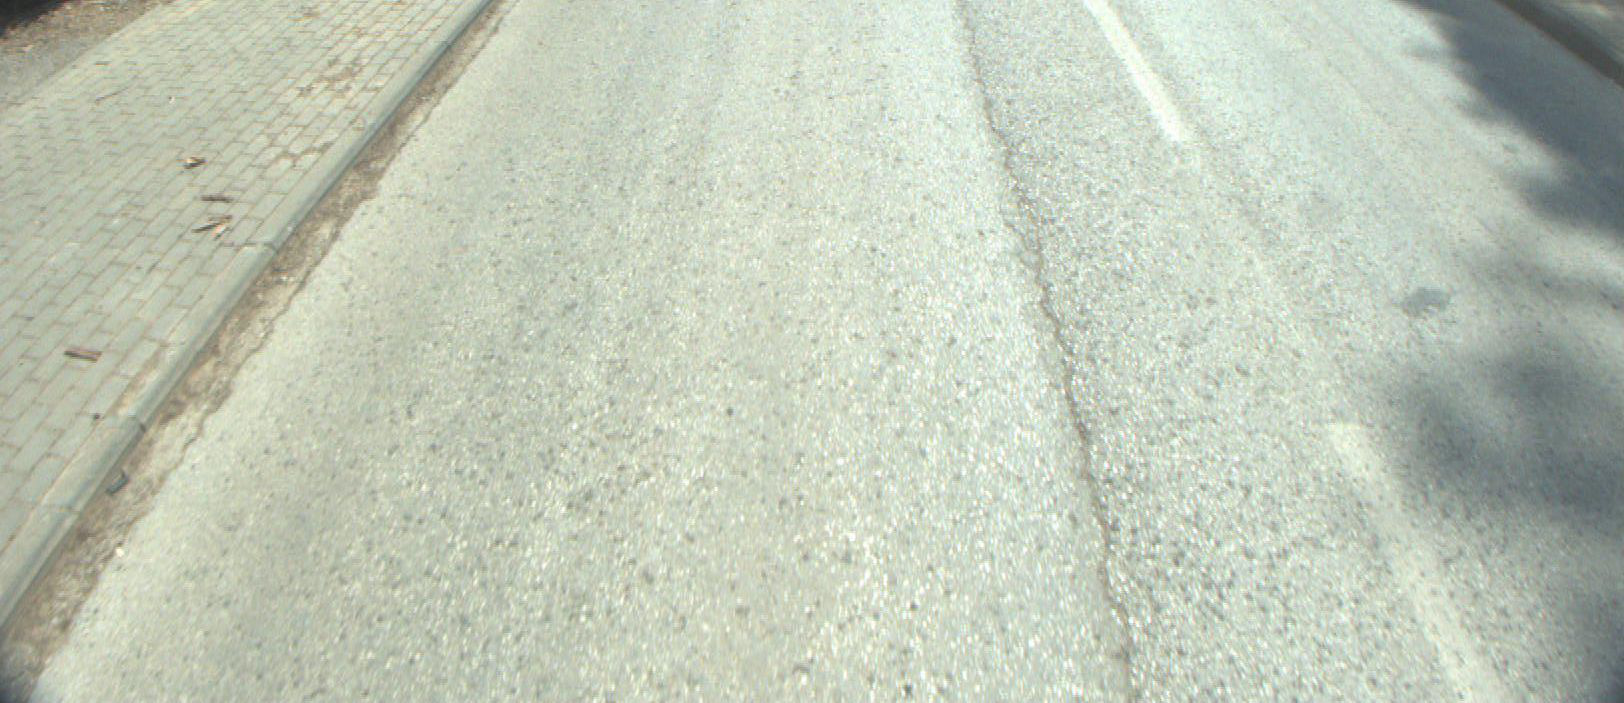

In [153]:
image.load_img ('newtest/'+files[0])

In [81]:
test = gen.flow_from_directory('newtest', target_size=(150,300),
                class_mode=None, shuffle=False, batch_size=1 ,color_mode='grayscale')

Found 115 images belonging to 2 classes.


In [82]:
import numpy as np
test1=np.concatenate([test.next() for i in range(test.samples)])

In [83]:
i=0

In [84]:
x=test1[i]

In [85]:
l=image.array_to_img (x)

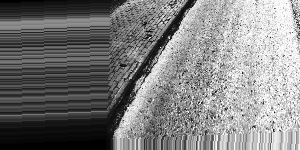

In [86]:
l

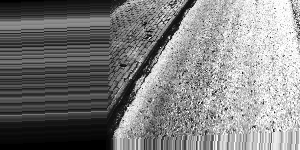

In [87]:
eq(l)

In [18]:
import PIL

In [19]:
from PIL.ImageOps import equalize as eq

In [162]:
val.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1,